# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
!pip install -r "../requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 134.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 151.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 122.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 27.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 153.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 170.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 170.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
cpu_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv')
cpu_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv')

cpu_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv')
cpu_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv')

In [5]:
df_raw_a = cpu_train_a.copy()
df_raw_b = cpu_train_b.copy()

In [6]:
dfs = [df_raw_a, df_raw_b]
for df_raw in dfs:
    print(df_raw.describe())
    print('################')
    print(df_raw.info())

              cpu
count  420.000000
mean     1.233262
std      0.505668
min      0.570000
25%      0.787500
50%      1.110000
75%      1.582500
max      2.550000
################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB
None
              cpu
count  600.000000
mean     1.282733
std      0.484951
min      0.570000
25%      0.840000
50%      1.240000
75%      1.610000
max      2.550000
################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB
None


In [7]:
# transformations
df_interim_a = df_raw_a.copy()
df_interim_b = df_raw_b.copy()

df_interim_a['datetime'] = pd.to_datetime(df_interim_a['datetime'])
df_interim_b['datetime'] = pd.to_datetime(df_interim_b['datetime'])

In [8]:
df_interim_a = df_interim_a.set_index(df_interim_a['datetime'])
df_interim_b = df_interim_b.set_index(df_interim_b['datetime'])

In [9]:
df_interim_a = df_interim_a.drop('datetime', axis=1)
df_interim_b = df_interim_b.drop('datetime', axis=1)

In [10]:
df_a = df_interim_a.copy()
df_b = df_interim_b.copy()

In [11]:
df_a

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,1.93


In [12]:
df_b

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 04:37:00,1.45
2017-01-28 04:38:00,1.78
2017-01-28 04:39:00,1.77


In [13]:
print(df_a.describe())
print('##############')
print(df_b.describe())

              cpu
count  420.000000
mean     1.233262
std      0.505668
min      0.570000
25%      0.787500
50%      1.110000
75%      1.582500
max      2.550000
##############
              cpu
count  600.000000
mean     1.282733
std      0.484951
min      0.570000
25%      0.840000
50%      1.240000
75%      1.610000
max      2.550000


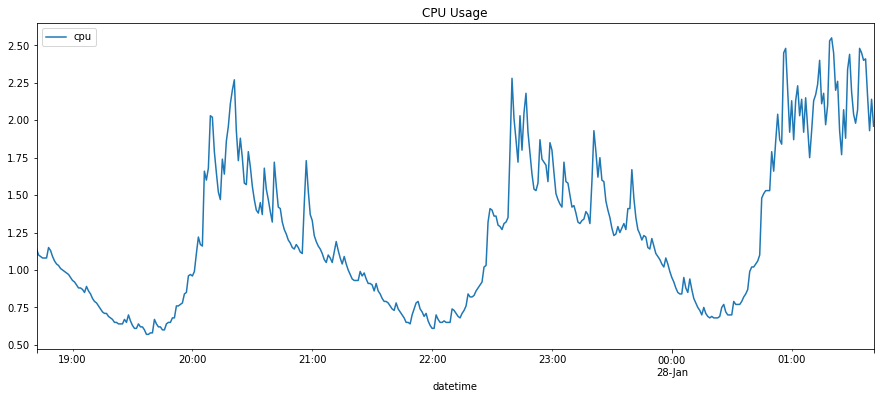

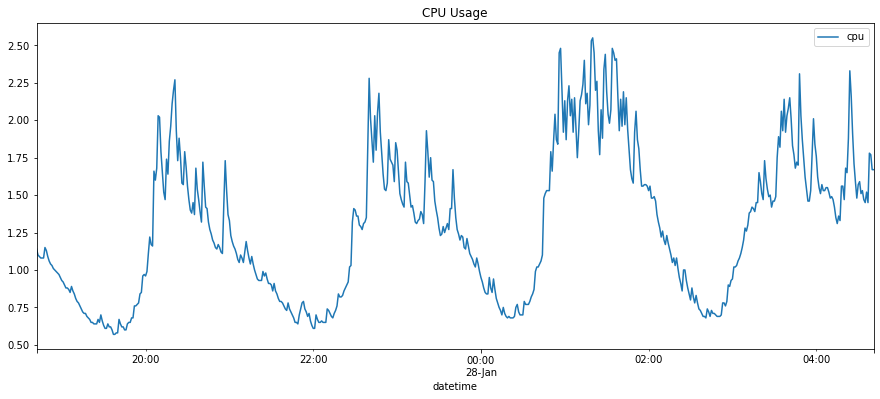

In [14]:
dfs = [df_a, df_b]
for df in dfs:
    df.plot(title="CPU Usage", figsize=(15,6))
    plt.show()

In [15]:
res = seasonal_decompose(df_a['cpu'].values, period=60) 
res_observed = res.observed
res_trend = res.trend
res_seasonal = res.seasonal
res_residual = res.resid

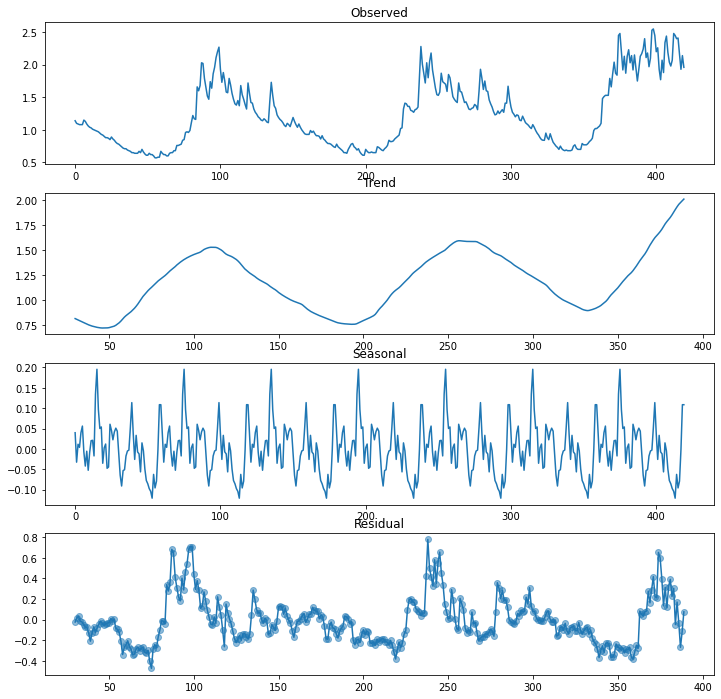

In [16]:
fig,ax = plt.subplots(4, figsize=(12,12))
ax[0].set_title('Observed')
ax[0].plot(res_observed)
ax[1].set_title('Trend')
ax[1].plot(res_trend)
ax[2].set_title('Seasonal')
ax[2].plot(res_seasonal)
ax[3].set_title('Residual')
ax[3].plot(res_residual)
ax[3].scatter(y=res_residual, x=range(len(res_residual)), alpha=0.5)
plt.show()

In [17]:
stepwise_model_a = auto_arima(
    df_a, start_p=1, start_q=1,
    max_p=3, max_q=3, m=3,
    start_P=0, seasonal=True,
    d=1, D=1, trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True)
print(stepwise_model_a.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=-262.589, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=-380.525, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=-263.922, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=-430.824, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=-432.567, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=-382.419, Time=0.03 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(2,1,0)[3]             : AIC=-430.938, Time=0.09 sec
 ARIMA(1,1,1)(2,1,0)[3]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,0)[3] intercept   : AIC=-430.572, Time=0.20 sec

B

In [18]:
stepwise_model_b = auto_arima(
    df_b, start_p=1, start_q=1,
    max_p=3, max_q=3, m=3,
    start_P=0, seasonal=True,
    d=1, D=1, trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=-365.917, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=-558.201, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=-365.598, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=-640.385, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=inf, Time=0.78 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=-641.102, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=-559.939, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[3]             : AIC=-640.657, Time=0.16 sec
 ARIMA(1,1,1)(2,1,0)[3]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[3] intercept   : AIC=-639.104, Time=0.25 sec

B

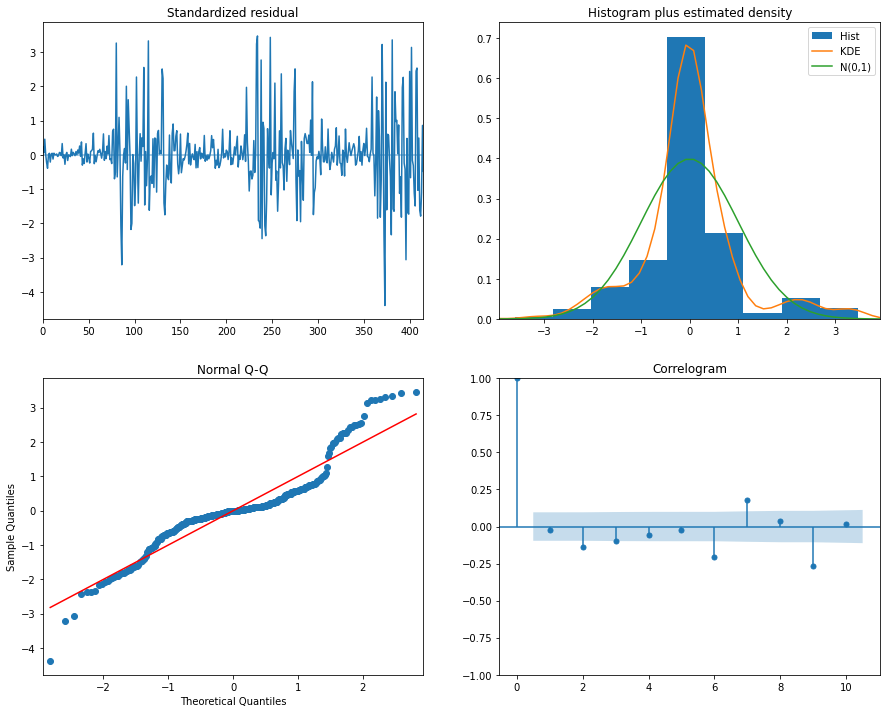

In [19]:
stepwise_model_a.fit(df_a).plot_diagnostics(figsize=(15, 12))
plt.show()

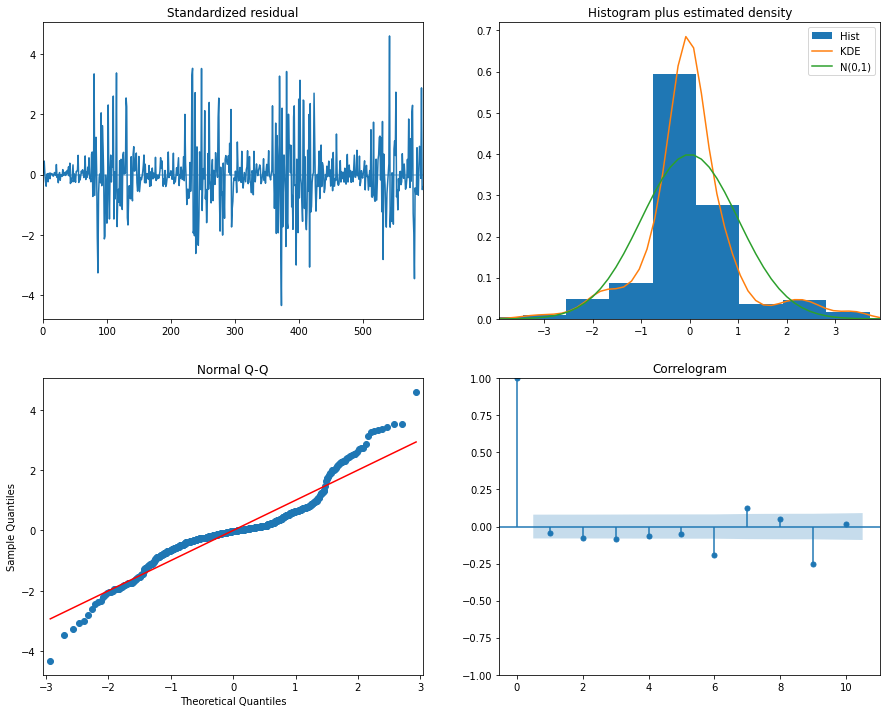

In [20]:
stepwise_model_b.fit(df_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [36]:
forecast_a = stepwise_model_a.predict(n_periods=60)
forecast_a

array([ 1.90026531,  2.1127645 ,  1.96124155,  1.84824675,  1.99004675,
        1.79507678,  1.65942253,  1.84826335,  1.67290603,  1.57098126,
        1.75234227,  1.57868665,  1.46172622,  1.63192482,  1.45034925,
        1.33193876,  1.51228134,  1.3354849 ,  1.22324466,  1.40056542,
        1.22326343,  1.10734278,  1.28321104,  1.10460265,  0.98904679,
        1.16694183,  0.98939304,  0.87485985,  1.05188278,  0.87406679,
        0.75871481,  0.93562935,  0.75762882,  0.64247877,  0.81976765,
        0.64198435,  0.52697999,  0.70405262,  0.52618581,  0.41101307,
        0.58810306,  0.41021788,  0.29510896,  0.4722618 ,  0.29441788,
        0.17932381,  0.35642809,  0.17856254,  0.06343639,  0.24055189,
        0.06268676, -0.05242278,  0.12470187, -0.05315607, -0.1682658 ,
        0.00884878, -0.16901418, -0.28412951, -0.10701127, -0.28487331])

In [37]:
forecast_b = stepwise_model_b.predict(n_periods=60)
forecast_b

array([1.69957616, 1.62478509, 1.73619735, 1.76612483, 1.68399971,
       1.83419024, 1.84959271, 1.76365788, 1.84574686, 1.87148196,
       1.79093528, 1.90807925, 1.93161196, 1.84855919, 1.96501929,
       1.98641175, 1.90322051, 2.00753147, 2.03125933, 1.94907155,
       2.06237761, 2.08519559, 2.00233516, 2.11354518, 2.13617616,
       2.05343823, 2.16291376, 2.18600752, 2.10342395, 2.21490435,
       2.2377323 , 2.1549934 , 2.26565561, 2.28850808, 2.20582537,
       2.31635375, 2.33928442, 2.25661726, 2.36753707, 2.39040258,
       2.30770396, 2.41839017, 2.4412744 , 2.35859283, 2.46930609,
       2.49220034, 2.40951784, 2.52029586, 2.54317614, 2.46048816,
       2.57120979, 2.59409652, 2.51141282, 2.6221517 , 2.64503883,
       2.56235402, 2.67310082, 2.69598534, 2.61329978, 2.72403466])

In [27]:
test_a = cpu_test_a.copy()
test_a = test_a.set_index(test_a['datetime']).drop('datetime', axis=1)

test_b = cpu_test_b.copy()
test_b = test_b.set_index(test_b['datetime']).drop('datetime', axis=1)


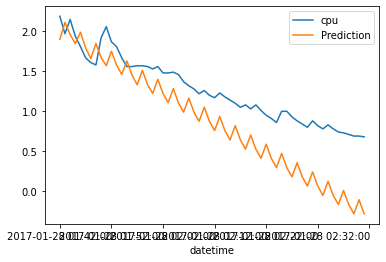

In [41]:
forecast_a = pd.DataFrame(forecast_a,index = test_a.index,columns=['Prediction'])
pd.concat([test_a,forecast_a],axis=1).plot()
plt.show()

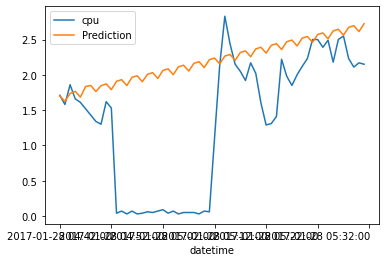

In [43]:
forecast_b = pd.DataFrame(forecast_b,index = test_b.index,columns=['Prediction'])
pd.concat([test_b,forecast_b],axis=1).plot()
plt.show()